# Variante 1 de LenNet5

## Réalisé par : Ahmed Mrabet

Dans ce notebook, nous allons effectuer une implémentation de la variante 1 de l'architecture LeNet5. Cette variante contient les modifications suivantes par rapport à l'architecture originale :
-	Retirer l’une des couches
-	Changer la méthode de sous-échantillonnage avec MaxPooling2D
-	Augmenter le nombre de filtres (en mettant leurs tailles a 3)
-	Augmenter le taux d'apprentissage
-	Utilisation de la fonction d’activation « LeakyReLU »
-	Réduire le nombre d’epochs a 5

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Dataset

In [2]:
img_height = 32
img_width = 32
batch_size = 64

train_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/train/", image_size=(img_height, img_width), batch_size=batch_size)
test_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/test/", image_size=(img_height, img_width), batch_size=batch_size)
validation_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/validation/", image_size=(img_height, img_width), batch_size=batch_size)

Found 4142 files belonging to 3 classes.
Found 1375 files belonging to 3 classes.
Found 1385 files belonging to 3 classes.


#### Visualisation des données

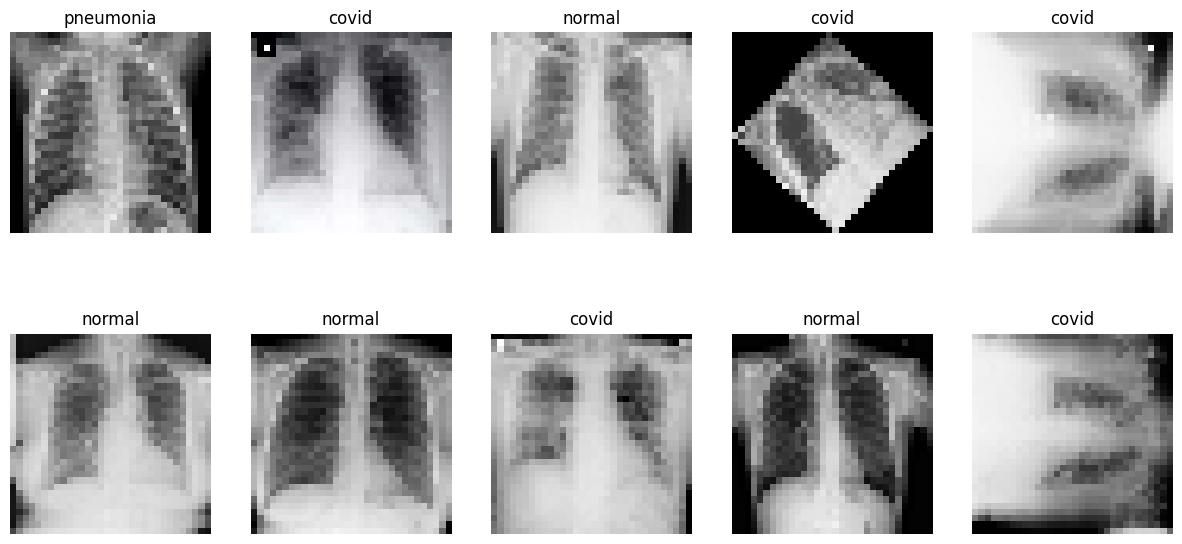

In [3]:
class_names = train_dataset.class_names
plt.figure(figsize=(15, 15))
for images, labels in train_dataset.take(1):
    for i in range(10):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [4]:
def convert_to_grayscale(image, label):
    image = tf.image.rgb_to_grayscale(image)  # Convert to grayscale
    return image, label

train_dataset = train_dataset.map(convert_to_grayscale)
validation_dataset = validation_dataset.map(convert_to_grayscale)
test_dataset = test_dataset.map(convert_to_grayscale)

### Step 2: Création du modèle

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (
    Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
)

In [9]:
model = Sequential([    
    Rescaling(1./255),
    
    Conv2D(16, kernel_size=(3, 3), activation='leaky_relu', input_shape=(img_height, img_width, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    
    Conv2D(32, kernel_size=(3, 3), activation='leaky_relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Flatten(),
    Dense(84, activation='leaky_relu'),
    Dense(3, activation='softmax')  # 3 classes: Normal, Pneumonia, COVID
])

### Step 3: Paramétrage du modèle

In [10]:
model.compile(
  optimizer=tf.optimizers.Adam(learning_rate=0.0001), 
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), 
  metrics=['accuracy']
)

### Step 4: Training du modèle

In [11]:
model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=5
)

Epoch 1/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 24s 310ms/step - accuracy: 0.5013 - loss: 1.0647 - val_accuracy: 0.6809 - val_loss: 0.9725
Epoch 2/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 18s 280ms/step - accuracy: 0.6831 - loss: 0.9289 - val_accuracy: 0.6931 - val_loss: 0.8100
Epoch 3/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 17s 267ms/step - accuracy: 0.7074 - loss: 0.7691 - val_accuracy: 0.7285 - val_loss: 0.7146
Epoch 4/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 18s 272ms/step - accuracy: 0.7425 - loss: 0.6819 - val_accuracy: 0.7437 - val_loss: 0.6626
Epoch 5/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 228ms/step - accuracy: 0.7547 - loss: 0.6445 - val_accuracy: 0.7668 - val_loss: 0.6233


### Step 5: Test

In [12]:
model.evaluate(test_dataset, verbose=2)

22/22 - 2s - 95ms/step - accuracy: 0.7535 - loss: 0.6224


[0.622352659702301, 0.7534545660018921]